# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Load the dataset

In [2]:
df = pd.read_csv("dataset.csv")

# 3. Basic Exploration

In [3]:
print("Shape:", df.shape)

Shape: (2000, 21)


In [4]:
print("Columns:", df.columns)

Columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [7]:
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


# 4. Check for missing values

In [8]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# 5. Correlation Heatmap

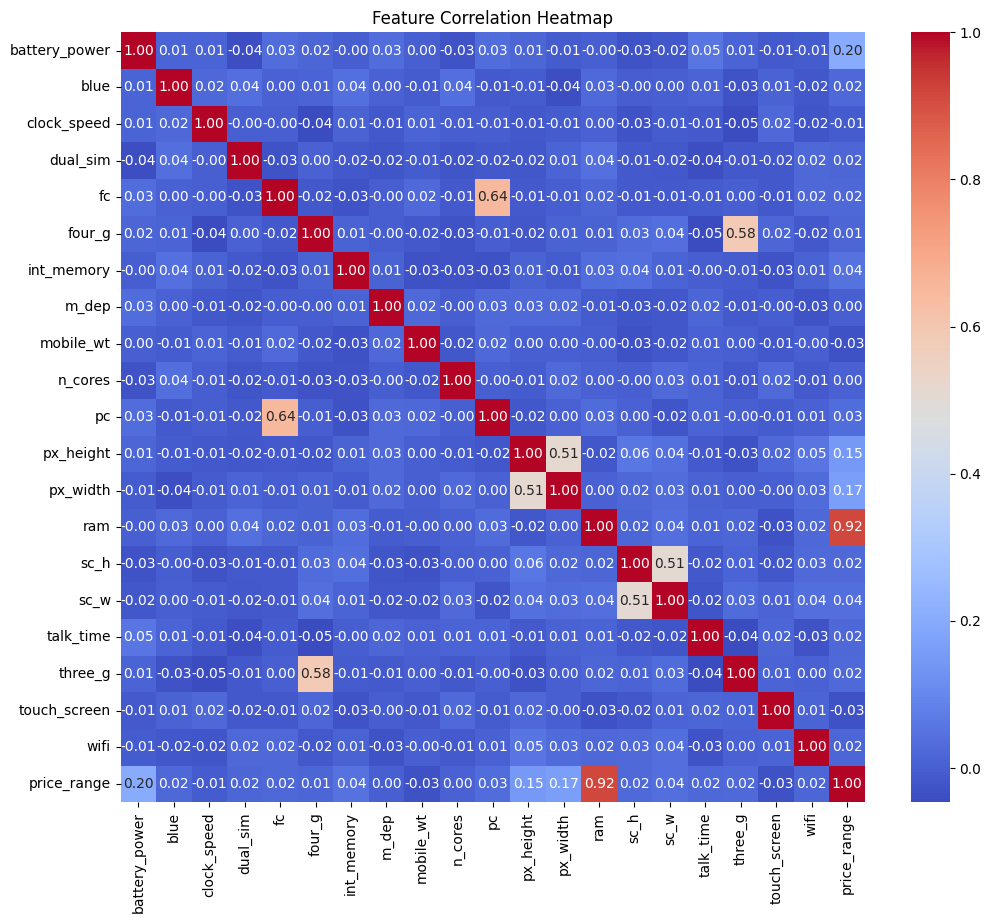

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 6. Feature Distribution

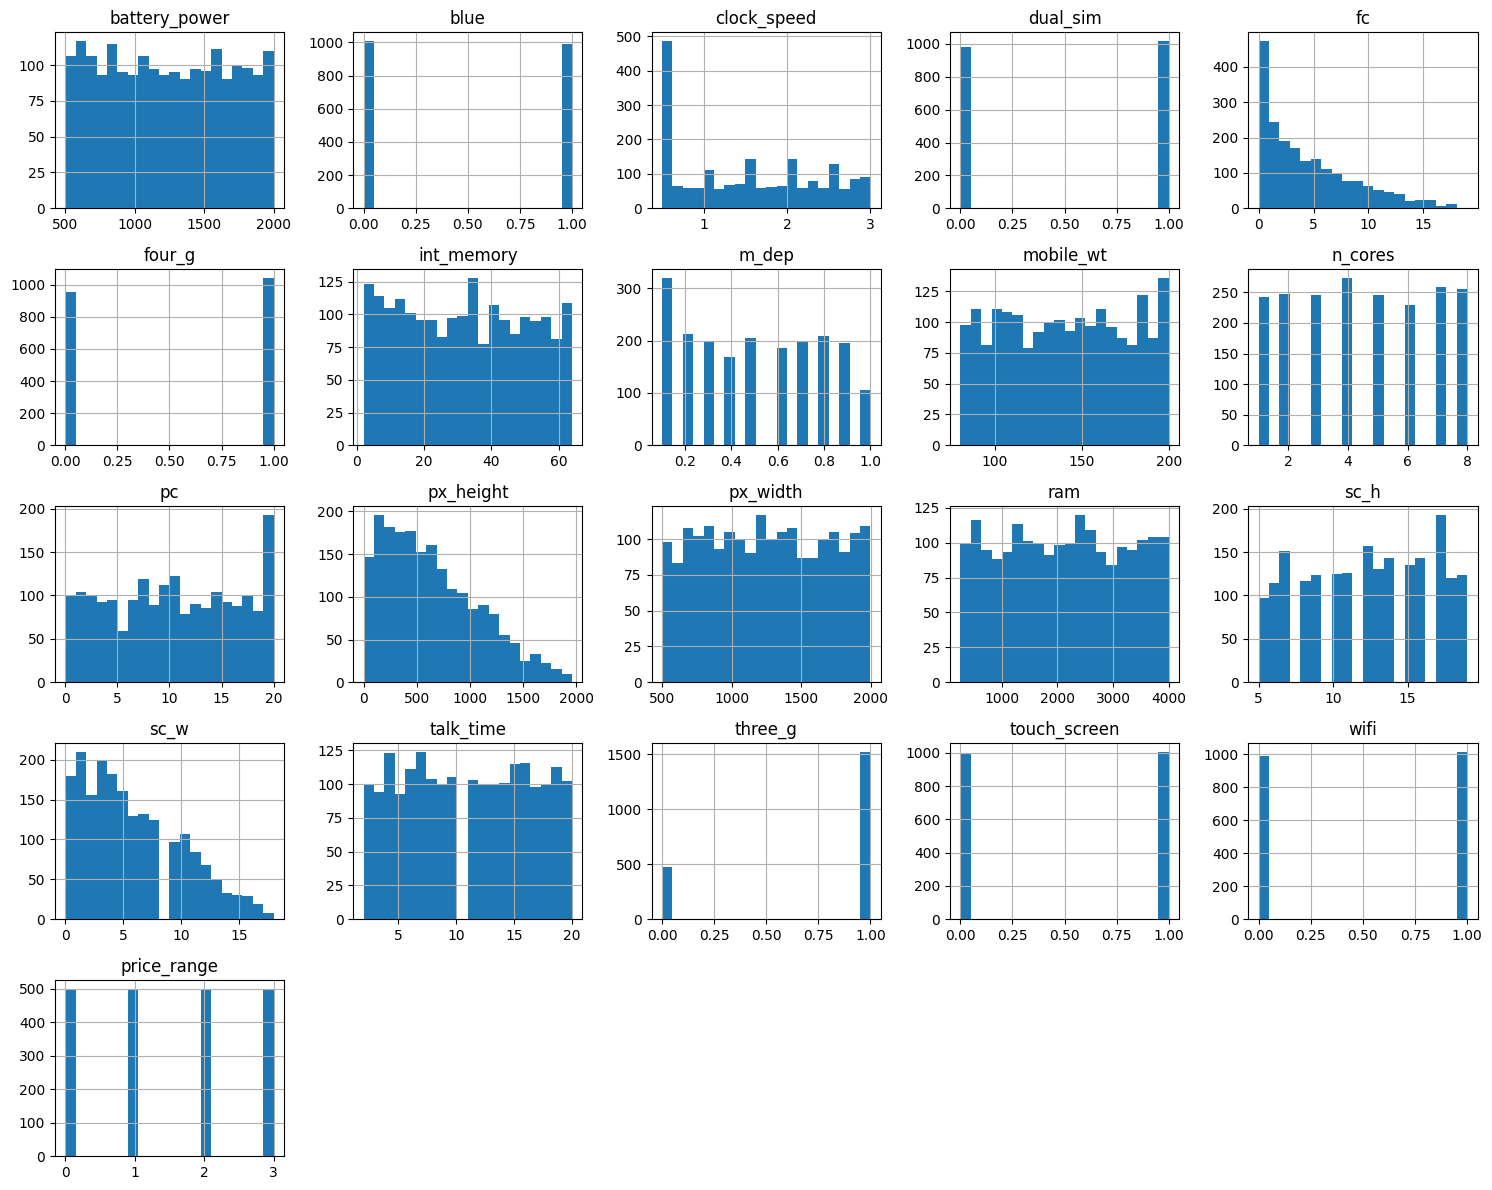

In [10]:
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

# 7. Define Features and Target

In [11]:
X = df.drop("price_range", axis=1)
y = df["price_range"]


# 8. Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 9. Feature Scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train and Compare Multiple Models

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC(kernel='rbf'),
    "SVM (Linear)": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, acc, f1))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)
print(results_df)

  File "C:\Users\Frough\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Program Files\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Program Files\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python310\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                 Model  Accuracy  F1 Score
0  Logistic Regression    0.9650  0.964986
5         SVM (Linear)    0.9625  0.962497
8              XGBoost    0.9350  0.934982
9             LightGBM    0.9175  0.917656
6    Gradient Boosting    0.9150  0.914687
4            SVM (RBF)  

- We now know that Logistic Regression , SVM (Linear) and XGBoost Classifier are exceptionally strong.
- This suggests that our data may be linearly separable (especially after scaling).

# 11. Hyperparameter tuning for Logistic Regression , XGBoost , SVM(Linear)

In [ ]:
# Tuning Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'],                       
    'max_iter': [500, 1000]
}

logreg = LogisticRegression(multi_class='multinomial')
grid_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_weighted')
grid_lr.fit(X_train_scaled, y_train)

# Evaluate best model
print("Best Params:", grid_lr.best_params_)
best_logreg = grid_lr.best_estimator_

Best Params: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


In [16]:
#Tuning XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

print("Best XGBoost params:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

Best XGBoost params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [17]:
# Tuning SVM Classifier(Linear)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'probability': [True]  # Required for voting/stacking
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

Best SVM params: {'C': 10, 'kernel': 'linear', 'probability': True}


In [18]:
# Evaluate tuned models
for model, name in zip([best_logreg, best_xgb, best_svm], ["LogReg", "XGBoost", "SVM"]):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} - Accuracy: {acc:.4f}, F1: {f1:.4f}")

LogReg - Accuracy: 0.9775, F1: 0.9775
XGBoost - Accuracy: 0.9350, F1: 0.9348
SVM - Accuracy: 0.9750, F1: 0.9750


# 12. Ensemble Techniques – Voting & Stacking

In [19]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', best_logreg),
        ('xgb', best_xgb),
        ('svm', best_svm)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_vote = voting_clf.predict(X_test_scaled)

print("Voting Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Voting F1:", f1_score(y_test, y_pred_vote, average='weighted'))

Voting Accuracy: 0.975
Voting F1: 0.974949686242156


In [20]:
# Stacking Classifier
stack_clf = StackingClassifier(
    estimators=[
        ('logreg', best_logreg),
        ('xgb', best_xgb),
        ('svm', best_svm)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method='predict_proba'
)

stack_clf.fit(X_train_scaled, y_train)
y_pred_stack = stack_clf.predict(X_test_scaled)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking F1:", f1_score(y_test, y_pred_stack, average='weighted'))

Stacking Accuracy: 0.98
Stacking F1: 0.9800334884339738


# 13. Visualize Model Performance

In [21]:
# Voting Classifier Report
print("Classification Report - Voting Classifier\n")
print(classification_report(y_test, y_pred_vote, target_names=[
    "Low Cost (0)", "Medium Cost (1)", "High Cost (2)", "Very High Cost (3)"
]))

# Stacking Classifier Report
print("\nClassification Report - Stacking Classifier\n")
print(classification_report(y_test, y_pred_stack, target_names=[
    "Low Cost (0)", "Medium Cost (1)", "High Cost (2)", "Very High Cost (3)"
]))


Classification Report - Voting Classifier

                    precision    recall  f1-score   support

      Low Cost (0)       0.99      1.00      1.00       100
   Medium Cost (1)       0.97      0.97      0.97       100
     High Cost (2)       0.96      0.95      0.95       100
Very High Cost (3)       0.98      0.98      0.98       100

          accuracy                           0.97       400
         macro avg       0.97      0.97      0.97       400
      weighted avg       0.97      0.97      0.97       400


Classification Report - Stacking Classifier

                    precision    recall  f1-score   support

      Low Cost (0)       0.99      1.00      1.00       100
   Medium Cost (1)       1.00      0.96      0.98       100
     High Cost (2)       0.95      0.98      0.97       100
Very High Cost (3)       0.98      0.98      0.98       100

          accuracy                           0.98       400
         macro avg       0.98      0.98      0.98       400
      

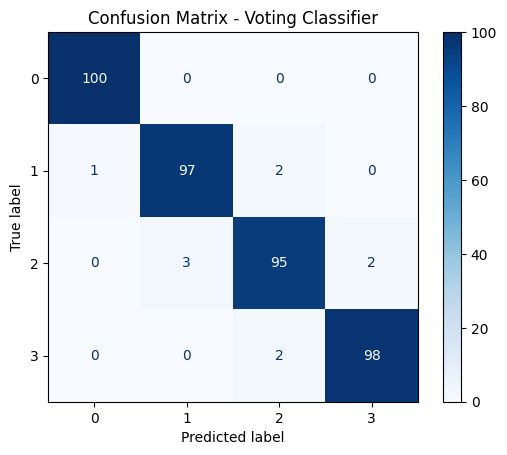

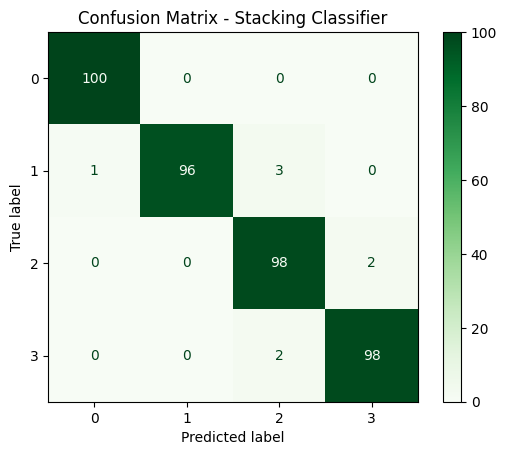

In [22]:
# Confusion Matrix for Voting Classifier
cm_vote = confusion_matrix(y_test, y_pred_vote)
disp_vote = ConfusionMatrixDisplay(confusion_matrix=cm_vote, display_labels=[0, 1, 2, 3])
disp_vote.plot(cmap='Blues')
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

# Confusion Matrix for Stacking Classifier
cm_stack = confusion_matrix(y_test, y_pred_stack)
disp_stack = ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=[0, 1, 2, 3])
disp_stack.plot(cmap='Greens')
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()


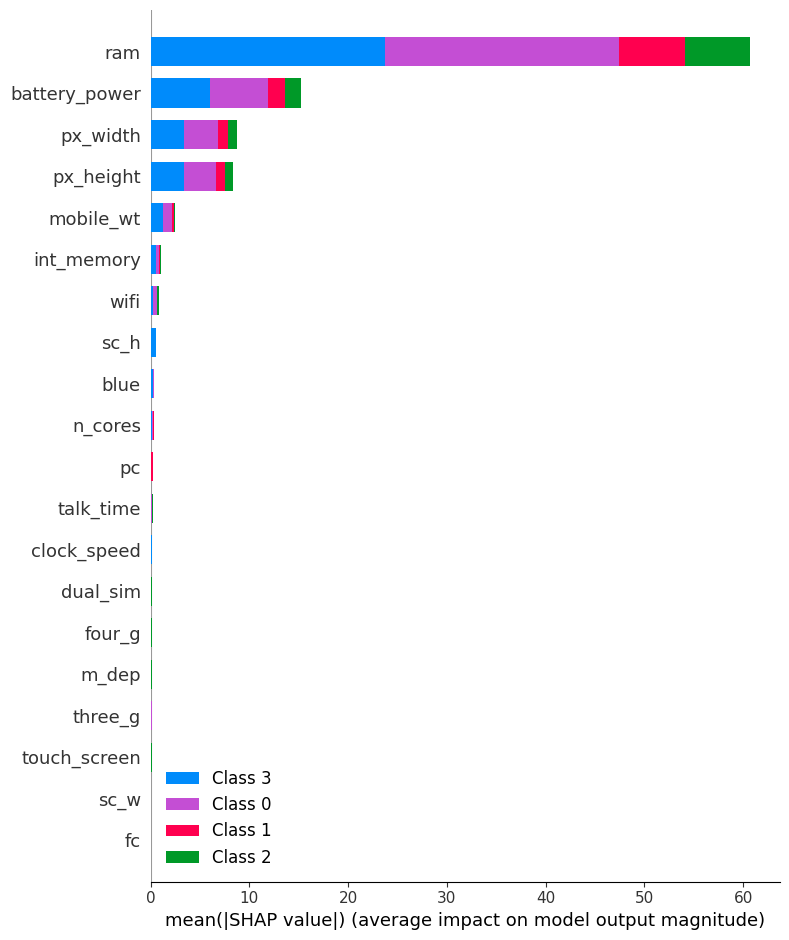

In [32]:

X_train_scaled_named = pd.DataFrame(X_train_scaled, columns=X_train.columns)
explainer = shap.Explainer(best_logreg, X_train_scaled_named)
shap_values = explainer(X_train_scaled_named)
shap.summary_plot(shap_values, X_train_scaled_named)

# 14. Exporting all the necessary items

In [24]:
# Export model
joblib.dump(stack_clf, 'stacking_model.pkl')

# Export scaler
joblib.dump(scaler, 'scaler.pkl')

# Export feature names
joblib.dump(X.columns.tolist(), 'features.pkl')

# Export class labels
joblib.dump(['low', 'medium', 'high', 'very high'], 'target_labels.pkl')


['target_labels.pkl']